In [1]:
%pylab inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# We can use .head() to get just the first few rows of the data.
train_data.head()
# Note how the notebook nicely displays the output for us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [6]:
train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

# more people from C survived, more females survived
columns_map = {'Embarked': {'C': 4, 'Q': 2, 'S': 1}, 'Sex': {'male': 1, 'female': 5}, 'Pclass': {1 : 'a', 2 : 'b', 3 : 'c'}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

remap = {'Pclass' : {'a': 3, 'b' : 2, 'c' : 1}}
train_data.replace(remap, inplace=True)
test_data.replace(remap, inplace=True)

# higher class women survival rate is massively higher than the other demographics
# higher class men have a slightly higher survival rate than poorer men
train_data['SexPclass'] = train_data['Sex'] * train_data['Pclass']
test_data['SexPclass'] = test_data['Sex'] * test_data['Pclass']

# drop sex and pclass as their features are incorporated in sexpclass
train_data.drop(columns=['Sex', 'Pclass'], inplace=True)
test_data.drop(columns=['Sex', 'Pclass'], inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)

print(X_train.head())
print(y_train.head())
print(test_data.head())

                   Age  SibSp  Parch    Fare  Embarked  SexPclass
PassengerId                                                      
464          48.000000      0      0  13.000         1          2
160          29.699118      8      2  69.550         1          1
48           29.699118      0      0   7.750         2          5
403          21.000000      1      0   9.825         1          5
619           4.000000      2      1  39.000         1         10
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
              Age  SibSp  Parch     Fare  Embarked  SexPclass
PassengerId                                                  
892          34.5      0      0   7.8292         2          1
893          47.0      1      0   7.0000         1          5
894          62.0      0      0   9.6875         2          2
895          27.0      0      0   8.6625         1          1
896          22.0      1      1  12.2875         1          5


In [7]:
train_data.columns[train_data.isna().any()].tolist()
train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()

,Survived,Age,SibSp,Parch,Fare,Embarked,SexPclass
PassengerId,,,,,,,


0.8067796610169492
0.8101694915254237
0.8033898305084746
0.7966101694915254
0.8067796610169492


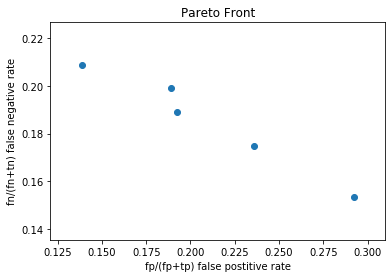

In [70]:
# for testing the 5 algos at once
xlist = []
ylist = []
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
BYR = sgd(max_iter=800, penalty = 'l1')
BYR.fit(X_train.values, y_train.values)
print(BYR.score(X_test.values, y_test.values))
y_pred = BYR.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 100)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X_train.values, y_train.values)
print(Gaussian_clf.score(X_test.values, y_test.values))
y_pred = Gaussian_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
plt.scatter(xlist, ylist)
plt.xlabel("fp/(fp+tp) false postitive rate")
plt.ylabel("fn/(fn+tn) false negative rate")
plt.title("Pareto Front")
plt.show()

In [20]:
xlist = []
ylist = []

In [ ]:
# tree_clf = tree.DecisionTreeClassifier()
# tree_clf.fit(X_train.values, y_train.values)
# print(tree_clf.score(X_test.values, y_test.values))
# y_pred = tree_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [ ]:
# knn_clf = neighbors.KNeighborsClassifier()
# knn_clf.fit(X_train.values, y_train.values)
# print(knn_clf.score(X_test.values, y_test.values))
# y_pred = knn_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [13]:
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8


C:\Users\bomna\Anaconda3\envs\aadenv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

In [ ]:
BYR = sgd(max_iter=800, penalty = 'l1')
BYR.fit(X_train.values, y_train.values)
print(BYR.score(X_test.values, y_test.values))
y_pred = BYR.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

In [182]:
# nusvc = svm.NuSVC(kernel = 'rbf', gamma = 'scale')
# nusvc.fit(X_train.values, y_train.values)
# print(nusvc.score(X_test.values, y_test.values))
# y_pred = nusvc.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [183]:
# lsvc = svm.LinearSVC(penalty = 'l1', dual = False)
# lsvc.fit(X_train.values, y_train.values)
# print(lsvc.score(X_test.values, y_test.values))
# y_pred = lsvc.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [184]:
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 100)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.7966101694915254


In [185]:
Gaussian_clf = GaussianNB()
Gaussian_clf.fit(X_train.values, y_train.values)
print(Gaussian_clf.score(X_test.values, y_test.values))
y_pred = Gaussian_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))

0.8067796610169492


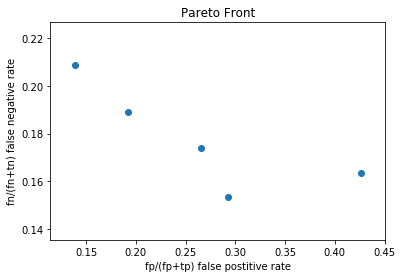

In [186]:
plt.scatter(xlist, ylist)
plt.xlabel("fp/(fp+tp) false postitive rate")
plt.ylabel("fn/(fn+tn) false negative rate")
plt.title("Pareto Front")
plt.show()

In [164]:
print([(xlist[i],ylist[i]) for i in range(len(xlist))])
print(len(xlist))

[(0.4067796610169492, 0.192090395480226), (0.26595744680851063, 0.17412935323383086), (0.19230769230769232, 0.1889400921658986), (0.18055555555555555, 0.20179372197309417), (0.29245283018867924, 0.15343915343915343), (0.13846153846153847, 0.20869565217391303)]
6


In [151]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[176  15]
 [ 41  63]]

True Negatives 176
False Positives 15
False Negatives 41
True Positives 63


Confusion matrix, without normalization
[[176  15]
 [ 41  63]]


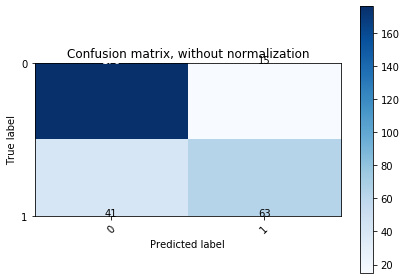

In [152]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [153]:
predictions = NN_clf.predict(test_data.values)

In [154]:
type(predictions)

numpy.ndarray

In [155]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [156]:
pred_df.to_csv('predictions.csv', header=True, sep=',')